In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from imblearn.over_sampling import SMOTE

In [5]:
test_features = pd.read_csv('Test_Features.csv')
test_labels = pd.read_csv('Test_Labels.csv')
test = pd.concat([test_features, test_labels], axis=1)

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3818 non-null   int64  
 1   tahun_kelahiran          3818 non-null   int64  
 2   pendidikan               3614 non-null   object 
 3   status_pernikahan        3636 non-null   object 
 4   pendapatan               3615 non-null   float64
 5   jumlah_anak_balita       3609 non-null   float64
 6   jumlah_anak_remaja       3608 non-null   float64
 7   terakhir_belanja         3617 non-null   float64
 8   belanja_buah             3632 non-null   float64
 9   belanja_daging           3623 non-null   float64
 10  belanja_ikan             3622 non-null   float64
 11  belanja_kue              3631 non-null   float64
 12  pembelian_diskon         3639 non-null   float64
 13  pembelian_web            3638 non-null   float64
 14  pembelian_toko          

In [9]:
test.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi
0,2241,1957,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,NaN,2.0
1,2274,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,NaN,0.0
2,1107,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,2013-08-06,1.0
3,4478,1971,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,NaN,4.0
4,5080,1974,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,NaN,4.0


In [11]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,3818.0,3.841507e+03,2.198401e+03,2.0,1950.75,3872.5,5.770750e+03,7.634000e+03
tahun_kelahiran,3818.0,1.967790e+03,1.180857e+01,1892.0,1959.00,1968.0,1.976000e+03,2.009000e+03
pendapatan,3615.0,1.163249e+08,5.105122e+07,2998899.0,81681624.00,117732079.0,1.506877e+08,1.305740e+09
jumlah_anak_balita,3609.0,2.829039e-01,4.650046e-01,0.0,0.00,0.0,1.000000e+00,2.000000e+00
jumlah_anak_remaja,3608.0,3.553215e-01,4.968651e-01,0.0,0.00,0.0,1.000000e+00,2.000000e+00
terakhir_belanja,3617.0,4.718137e+01,2.694029e+01,0.0,25.00,46.0,6.800000e+01,1.330000e+02
belanja_buah,3632.0,6.123408e+04,7.664759e+04,0.0,7497.50,29525.0,8.677675e+04,4.086460e+05
belanja_daging,3623.0,4.528484e+05,5.123206e+05,0.0,54621.00,232753.0,7.217960e+05,3.271191e+06
belanja_ikan,3622.0,8.533861e+04,1.037895e+05,0.0,10115.00,40025.5,1.296568e+05,5.749320e+05
belanja_kue,3631.0,6.380151e+04,7.842854e+04,0.0,8092.00,29251.0,9.140700e+04,5.320490e+05


In [13]:
num_cols = [
    'tahun_kelahiran',
    'pendapatan',
    'belanja_buah',
    'belanja_daging',
    'belanja_ikan',
    'belanja_kue',
    'jumlah_promosi'
]

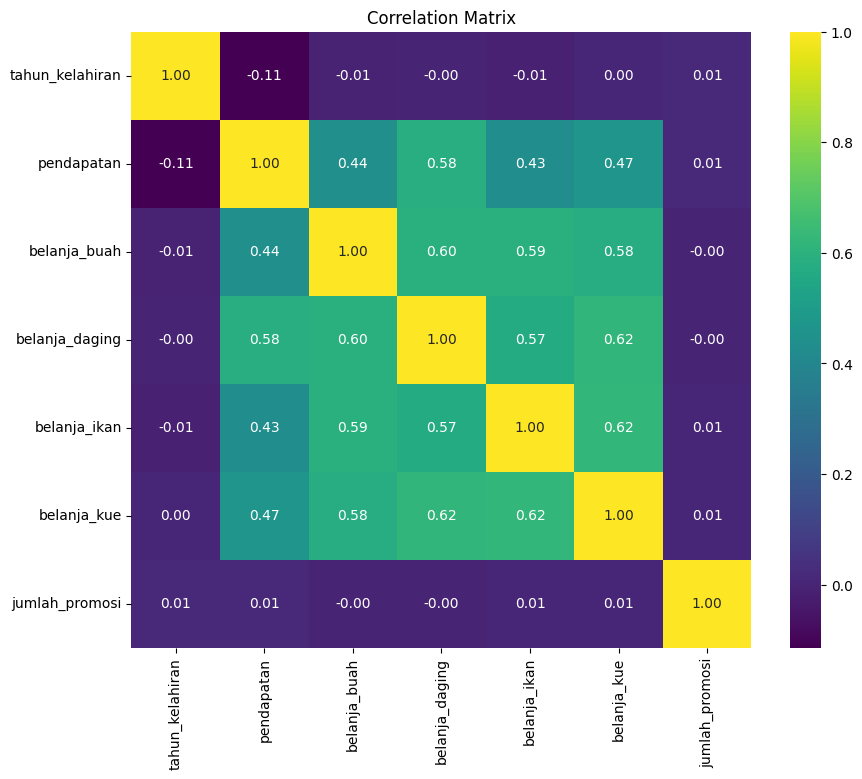

In [15]:
corr = test[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [17]:
test.isnull().sum()/(len(test))*100

,0
ID,0.000000
tahun_kelahiran,0.000000
pendidikan,5.343112
status_pernikahan,4.766894
pendapatan,5.316920
jumlah_anak_balita,5.474070
jumlah_anak_remaja,5.500262
terakhir_belanja,5.264536
belanja_buah,4.871661
belanja_daging,5.107386


In [19]:
test.drop(columns='tanggal_menjadi_anggota', inplace=True)

KeyError: "['tanggal_menjadi_anggota'] not found in axis"

In [21]:
test[test.select_dtypes(exclude=['number']).columns]

,pendidikan,status_pernikahan
0,Sarjana,NaN
1,Doktor,Menikah
2,SMA,Menikah
3,Doktor,Menikah
4,Sarjana,Rencana Menikah
...,...,...
3813,Magister,Sendiri
3814,Sarjana,Menikah
3815,Magister,Rencana Menikah
3816,Sarjana,Rencana Menikah


In [24]:
print('Nilai unik data kategorikal:')
print(f'pendidikan: {test["pendidikan"].unique()}')
print(f'status pernikahan: {test["status_pernikahan"].unique()}')

Nilai unik data kategorikal:
pendidikan: ['Sarjana' 'Doktor' 'SMA' 'Magister' nan 'SMP' '5']
status pernikahan: [nan 'Menikah' 'Rencana Menikah' 'Sendiri' 'Cerai Mati' 'Cerai' '5']


In [26]:
test['pendidikan'] = test['pendidikan'].replace('5', np.nan)
test['status_pernikahan'] = test['status_pernikahan'].replace('5', np.nan)

In [28]:
label_encoding = {
    'SMP': 0,
    'SMA': 1,
    'Sarjana': 2,
    'Magister': 3,
    'Doktor': 4
}

test['pendidikan'] = test['pendidikan'].map(label_encoding)

In [30]:
label_mapping = {
    'Meniak': 1,
    'Rencana Menikah': 2,
    'Sendiri': 3,
    'Cerai Mati': 4,
    'Cerai' : 5
}
test['status_pernikahan'] = test['status_pernikahan'].map(label_mapping)

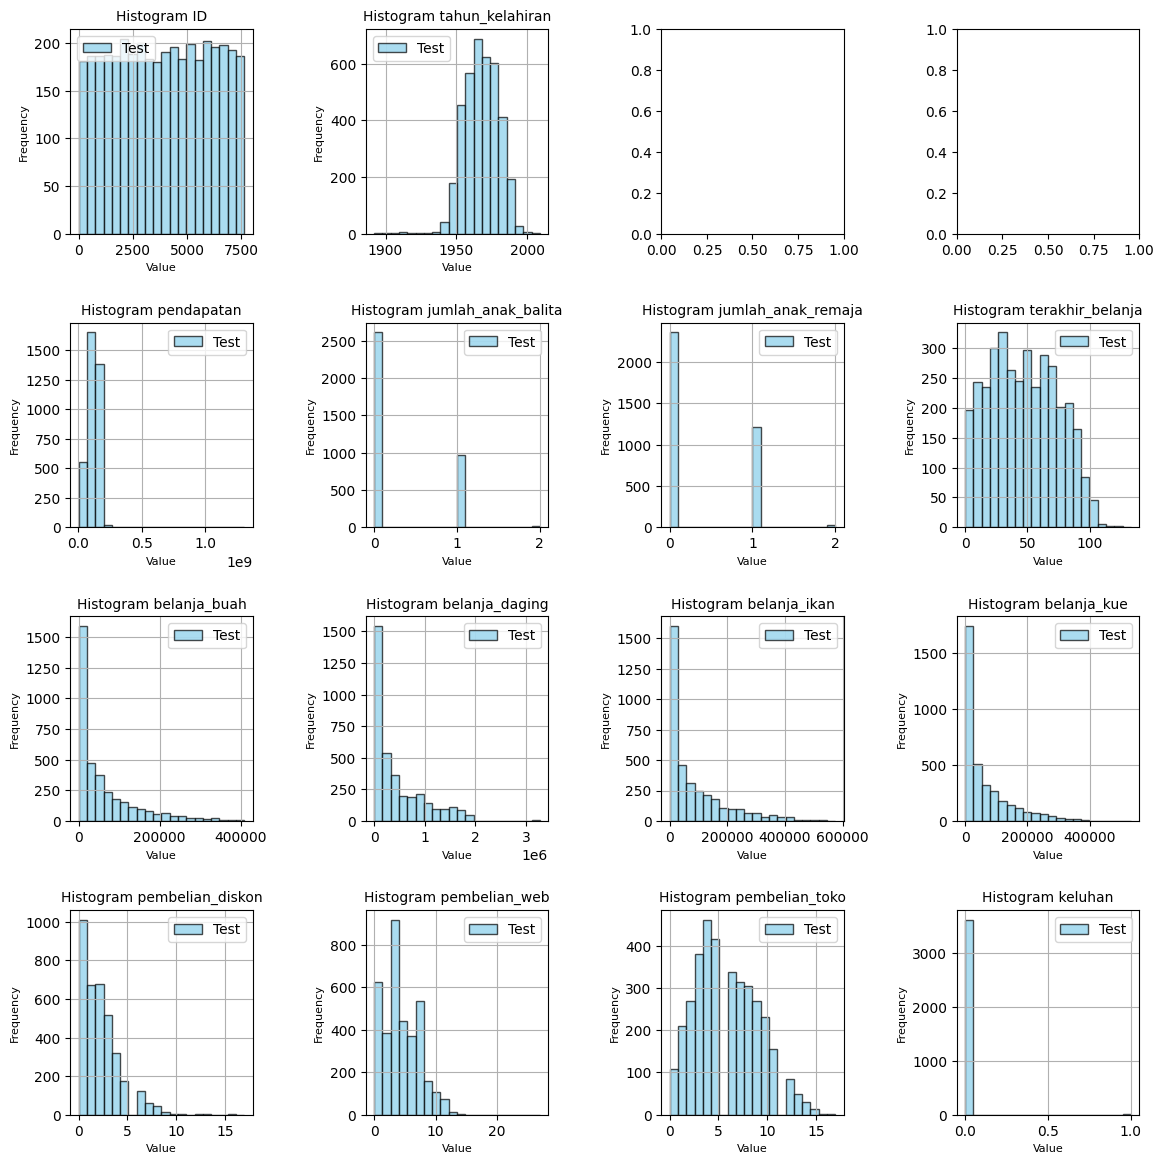

In [38]:
columns_to_plot = [col for col in test.select_dtypes(include=[np.number]).columns if col != 'jumlah_promosi']
num_cols = len(columns_to_plot)
num_rows = (num_cols + 3) // 4

fig_width = 12
fig_height = 3 * num_rows

fig, axes = plt.subplots(num_rows, 4, figsize=(fig_width, fig_height))

axes = axes.flatten() if num_rows > 1 else np.array([axes])
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    data_clean = test[column].dropna()
    if len(data_clean) > 0:
        ax.hist(data_clean, bins=20, color='skyblue', alpha=0.7, edgecolor='black', label='Test')
        ax.set_title(f'Histogram {column}', fontsize=10)
        ax.set_xlabel('Value', fontsize=8)
        ax.set_ylabel('Frequency', fontsize=8)
        ax.legend()
        ax.grid(True)

for i in range(len(columns_to_plot), num_rows * 4):
    fig.delaxes(axes[i])

plt.tight_layout(pad=2.0)
plt.show()

In [41]:
def winsorize(data, columns_to_winsorize=[]):
  if not columns_to_winsorize:
      raise ValueError("Please specify columns to winsorize in columns_to_winsorize argument.")

  for col in columns_to_winsorize:
    if col not in data.columns or not pd.api.types.is_numeric_dtype(data[col]):
      continue
    lower_bound = data[col].quantile(0.01, interpolation='nearest')
    upper_bound = data[col].quantile(0.99, interpolation='nearest')

    data.loc[data[col] < lower_bound, col] = lower_bound
    data.loc[data[col] > upper_bound, col] = upper_bound


columns_to_winsorize = ['pendapatan', 'belanja_buah', 'belanja_daging', 'pembelian_web']
winsorize(test, columns_to_winsorize)

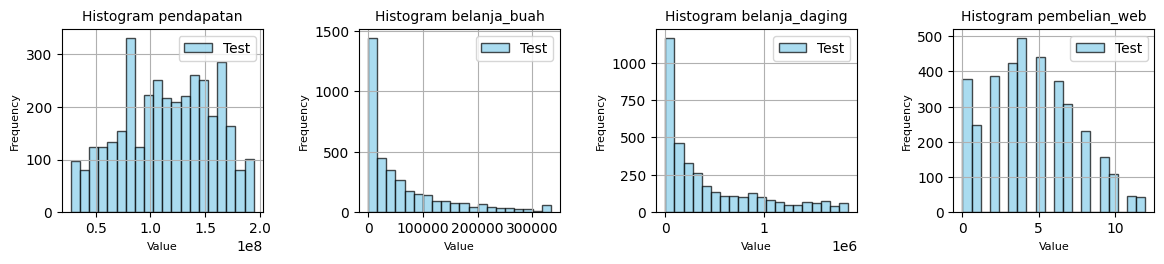

In [43]:
columns_to_plot = ['pendapatan', 'belanja_buah', 'belanja_daging', 'pembelian_web']
num_cols = len(columns_to_plot)
num_rows = (num_cols + 3) // 4

fig_width = 12
fig_height = 3 * num_rows

fig, axes = plt.subplots(1, num_cols, figsize=(fig_width, fig_height))

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    ax.hist(test[column], bins=20, color='skyblue', alpha=0.7, edgecolor='black', label='Test')
    ax.set_title(f'Histogram {column}', fontsize=10)
    ax.set_xlabel('Value', fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)
    ax.legend()
    ax.grid(True)

plt.tight_layout(pad=2.0)
plt.show()

In [45]:
test.isnull().sum()

,0
ID,0
tahun_kelahiran,0
pendidikan,3818
status_pernikahan,3818
pendapatan,203
jumlah_anak_balita,209
jumlah_anak_remaja,210
terakhir_belanja,201
belanja_buah,186
belanja_daging,195


In [47]:
test_second = test.fillna(method='bfill')

<ipython-input-47-d7c473c6ed3f>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_second = test.fillna(method='bfill')


In [54]:
nan_columns = numeric_data.columns[numeric_data.isna().all()]
print(f"Kolom yang hanya berisi NaN: {nan_columns}")

Kolom yang hanya berisi NaN: Index(['pendidikan', 'status_pernikahan'], dtype='object')


In [57]:
numeric_data_clean = numeric_data.dropna(axis=1, how='all')
IterativelyImputed = iterative_imputer.fit_transform(numeric_data_clean)
numeric_imputed_df = pd.DataFrame(IterativelyImputed, columns=numeric_data_clean.columns).round()

test_imputed = pd.concat([numeric_imputed_df, non_numeric_data], axis=1)
test_imputed.head()

,ID,tahun_kelahiran,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_promosi
0,2241.0,1957.0,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,2.0
1,2274.0,1968.0,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,0.0
2,1107.0,1968.0,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,1.0
3,4478.0,1971.0,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,4.0
4,5080.0,1974.0,164761134.0,0.0,0.0,28.0,333795.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,4.0


In [64]:
test_numeric = test.select_dtypes(include=[np.number])
test[test_numeric.columns] = test_numeric.fillna(test_numeric.mean())

test_non_numeric = test.select_dtypes(exclude=[np.number])

test['pendidikan'].fillna("Tidak diketahui", inplace=True)
test['status_pernikahan'].fillna("Belum menikah", inplace=True)

print(test.isnull().sum())

ID                    0
tahun_kelahiran       0
pendidikan            0
status_pernikahan     0
pendapatan            0
jumlah_anak_balita    0
jumlah_anak_remaja    0
terakhir_belanja      0
belanja_buah          0
belanja_daging        0
belanja_ikan          0
belanja_kue           0
pembelian_diskon      0
pembelian_web         0
pembelian_toko        0
keluhan               0
jumlah_promosi        0
dtype: int64


<ipython-input-64-f3c8215639f3>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['pendidikan'].fillna("Tidak diketahui", inplace=True)
<ipython-input-64-f3c8215639f3>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'